## Notebook from Daniel Leibner's lecture 
# Data visualization

In [1]:
import sys; print(sys.version)
import pandas as pd; print (pd.__version__ )
import seaborn as sns; print (sns.__version__)
import sklearn as skl; print (skl.__version__)
import matplotlib.pyplot as plt

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
1.3.4
0.11.2
0.24.2


## Exercise 3.1 - iris dataset

In [2]:
df = pd.read_csv('./iris_data_set.csv', na_values=['NA'])
sns.set_theme()
classes = df['class']                
features = df.drop(['class'], axis = 1 )
features = ((features - features.mean()) / features.std())
data = pd.concat([classes, features], axis=1)
df.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


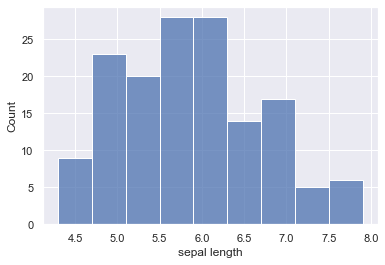

In [3]:
ax = sns.histplot(df['sepal length'])

plt.savefig('histplot.png',dpi=350,bbox_inches="tight")

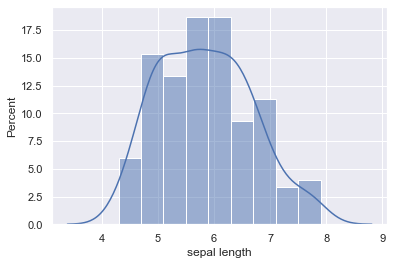

In [4]:
ax = sns.histplot(df['sepal length'], kde=True, stat='percent', kde_kws=dict(cut=3) )

fig = ax.get_figure()
fig.savefig('histplot_kde.png',dpi=350,bbox_inches="tight")


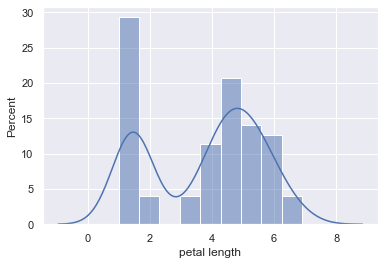

In [5]:
ax = sns.histplot(data=df,x ='petal length', kde=True, stat='percent', kde_kws=dict(cut=3) )

fig = ax.get_figure()
fig.savefig('petal_length_histplot.png',dpi=350,bbox_inches="tight")

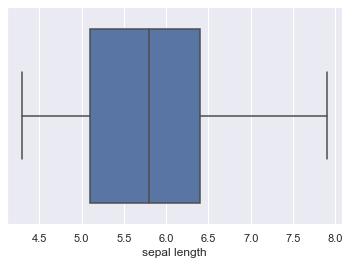

In [6]:
ax =sns.boxplot(data=df, x='sepal length')

fig = ax.get_figure()
fig.savefig('boxplot.png',dpi=350,bbox_inches="tight")


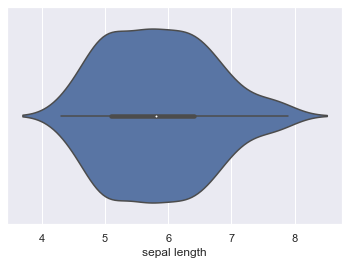

In [7]:
sns.violinplot(data= df , x='sepal length')


plt.savefig('violinplot sepal_length.png',dpi=350,bbox_inches="tight")

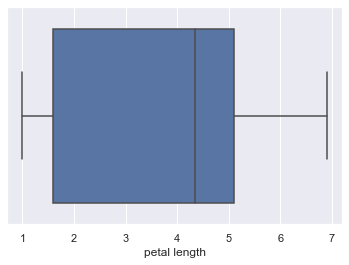

In [8]:
ax =sns.boxplot(data=df, x='petal length')

fig = ax.get_figure()
fig.savefig('boxplot_petal_length.png',dpi=350,bbox_inches="tight")


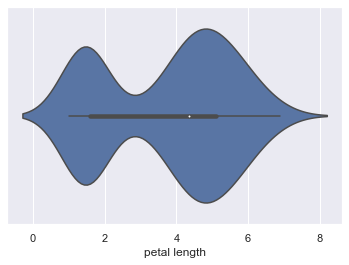

In [9]:
sns.violinplot(data= df ,x ='petal length')


plt.savefig('violinplot petal_length.png',dpi=350,bbox_inches="tight")

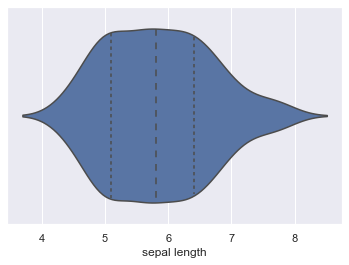

In [10]:
sns.violinplot(data= df , x='sepal length',inner="quart")


plt.savefig('violinplot_quart sepal_length.png',dpi=350,bbox_inches="tight")

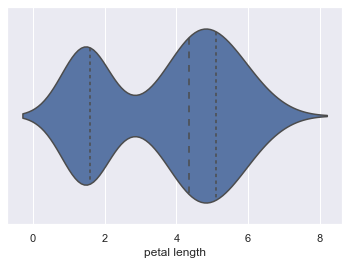

In [11]:
sns.violinplot(data= df ,x ='petal length',inner="quart")


plt.savefig('violinplot_quart petal_length.png',dpi=350,bbox_inches="tight")

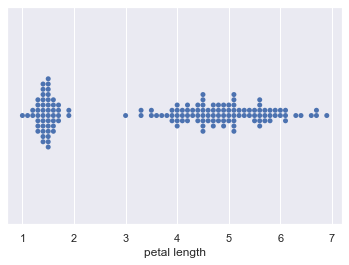

In [12]:
sns.swarmplot(data=df, x="petal length")

plt.savefig('swarn plot petal length.png',dpi=350,bbox_inches="tight")

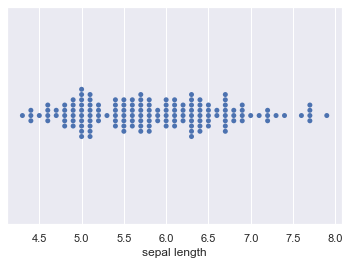

In [13]:
sns.swarmplot(data=df, x="sepal length")

plt.savefig('swarn plot sepal length.png',dpi=350,bbox_inches="tight")

In [14]:
# ax = sns.boxplot(data=df, x='sepal length',y="class")

# fig = ax.get_figure()
# fig.savefig('boxplot_hue.png',dpi=350,bbox_inches="tight")


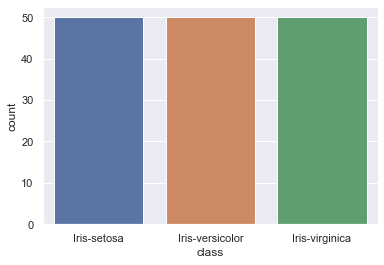

In [15]:
ax = sns.countplot(data=df, x='class' )

fig = ax.get_figure()
fig.savefig('countplot.png',dpi=350,bbox_inches="tight")


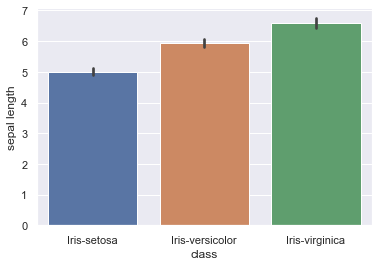

In [16]:
ax = sns.barplot(data=df, x='class',y='sepal length' )

fig = ax.get_figure()
fig.savefig('barplot.png',dpi=350,bbox_inches="tight")



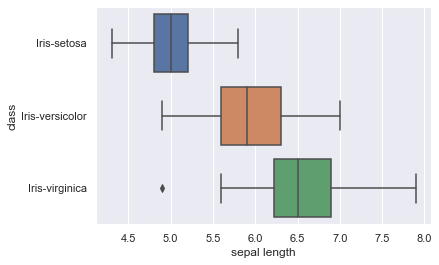

In [17]:
ax = sns.boxplot(data=df, x='sepal length',y="class" )


fig = ax.get_figure()
fig.savefig('boxplot_categorys.png',dpi=350,bbox_inches="tight")



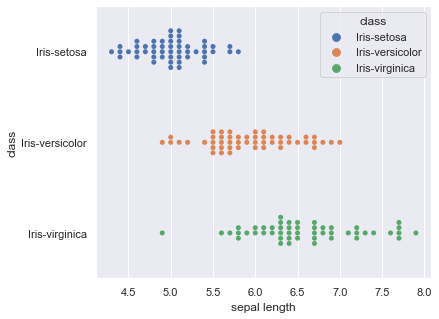

In [18]:
plt.figure(figsize=(6,5))


sns.swarmplot(data=df, x='sepal length',y='class' ,hue='class' )


plt.savefig('swarmplot sepal length hue.png',dpi=350,bbox_inches="tight")

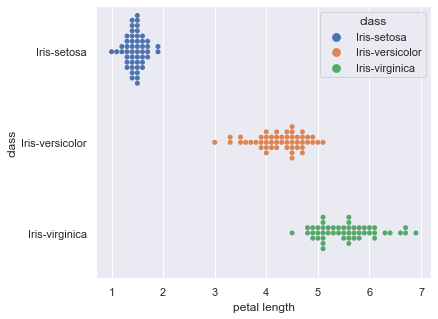

In [19]:
plt.figure(figsize=(6,5))

sns.swarmplot(data=df, x='petal length',y='class' ,hue='class' )


plt.savefig('swarmplot petal length hue.png',dpi=350,bbox_inches="tight")


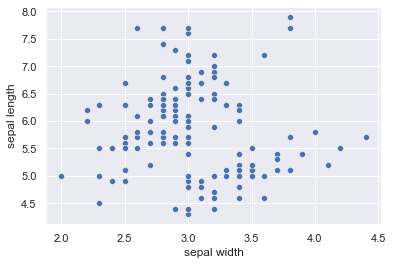

In [20]:
ax = sns.scatterplot(data=df, x='sepal width',y ='sepal length')


fig = ax.get_figure()
fig.savefig('scatterplot.png',dpi=350,bbox_inches="tight")



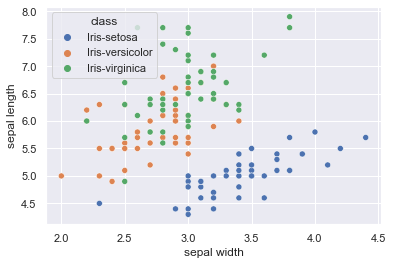

In [21]:
ax = sns.scatterplot(data=df, x='sepal width',y ='sepal length',hue="class")


fig = ax.get_figure()
fig.savefig('scatterplot_hue.png',dpi=350,bbox_inches="tight")

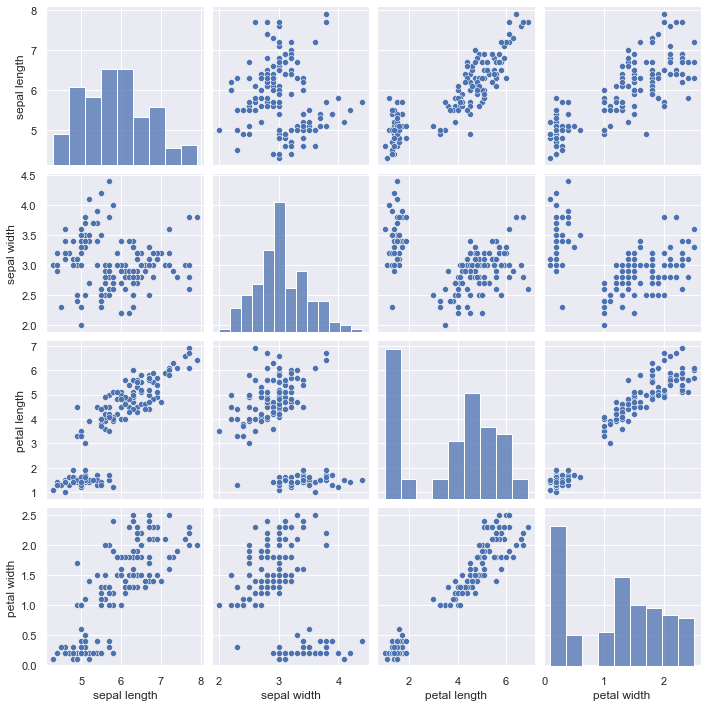

In [22]:
sns.pairplot(data=df)


plt.savefig('pairplot.png',dpi=350,bbox_inches="tight")

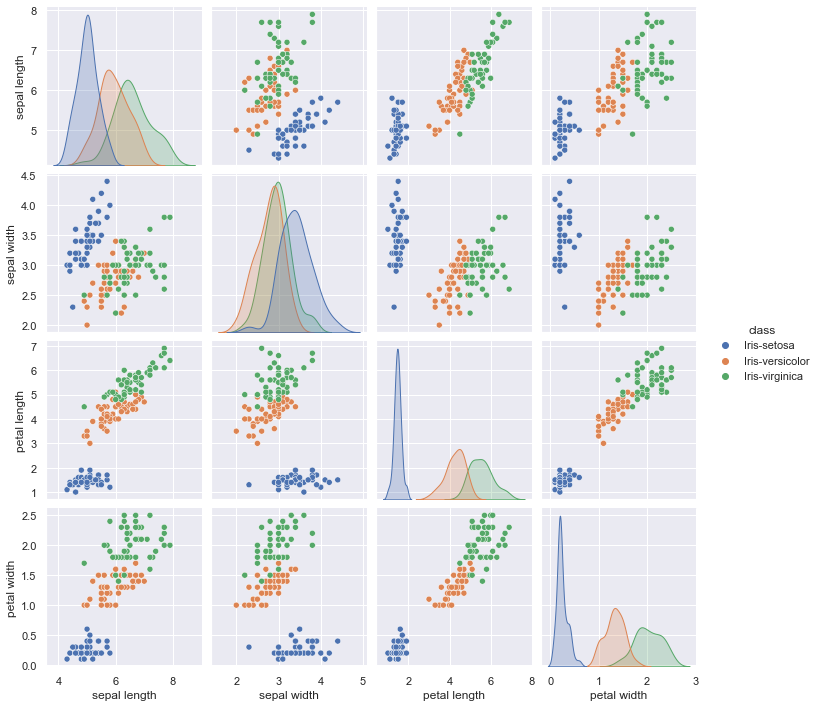

In [23]:
sns.pairplot(data=df,hue='class')


plt.savefig('pairplot_hue.png',dpi=350,bbox_inches="tight")

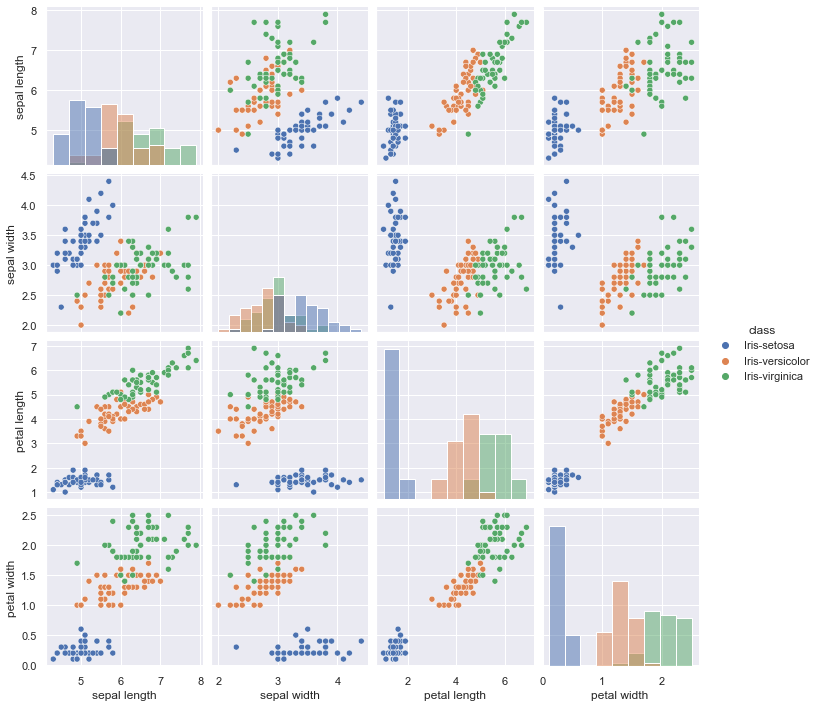

In [24]:
sns.pairplot(data=df,hue='class', diag_kind="hist")


plt.savefig('pairplot_hue_dig_hist.png',dpi=350,bbox_inches="tight")


In [ ]:
pg =sns.PairGrid(data=df,hue='class')
pg.map_lower(sns.scatterplot)
pg.map_lower(sns.kdeplot,levels=3)

pg.map_upper(sns.regplot,
             scatter=False,robust=True)

pg.map_diag(sns.kdeplot,levels=1)
pg.map_diag(sns.kdeplot,levels=1,
            hue=None,color="0.1")

pg.add_legend()
sns.move_legend(pg,'upper right')


plt.savefig('pg_pairplot_hue_map_lower_and_map_dig.png',dpi=350,bbox_inches="tight")


In [ ]:
plt.figure(figsize=(15,15))
data = pd.melt(df, id_vars="class",
                   var_name="features",
                   value_name='value')
sns.swarmplot(x="features", y="value", hue="class", data=data)
plt.savefig('swarn plot features by class.png',dpi=350,bbox_inches="tight")

In [ ]:
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="class", data=data, inner="quart")
plt.savefig('violin plot features by class.png',dpi=350,bbox_inches="tight")

In [ ]:
plt.figure(figsize=(15,15))
sns.factorplot(x="features", y="value", hue="class", data=data, kind="box", size=10)
plt.savefig('box plot features by class.png',dpi=350,bbox_inches="tight")

In [ ]:
plt.figure(figsize=(15,15))
data = pd.concat([classes, features], axis=1)
sns.pairplot(data, hue='class', size=2.5);
plt.savefig('Exercise - pair plot.png',dpi=350,bbox_inches="tight")

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

plt.savefig('heat map.png', dpi=350,bbox_inches="tight")